# A demonstration for loading and plotting Bepicolombo MMO (Mio) observation data using Mio-SC plug-ins for PySPEDAS 
(Last updated: Jan 06, 2026, Author: Chae-Woo Jun)

This notebook demonstrates basic examples of loading and plotting observation data obtained from the Mio satellite in PySPEDAS environment.
Please refer to the following website for the details of the data:
* [https://miosc.isee.nagoya-u.ac.jp/data/mio.php]
---

## Contents
1. General information on Mio-SC plug-in for PySPEDAS
1. Basic commands and inforamtion of Mio-SC plug-in and PySPEDAS
1. Demonstration of Mio-SC plug-in
    1. Load and plot Mio data
        1. SPM
        1. MIA
        1. PWI/OFA (B)
    1. Plot multiple data

---

## 1. General information on Mio-SC plug-in for PySPEDAS
* Mio-SC aims to develop and to provide analysis tools to handle data obtained from the Mio satellite for PySPEDAS in python, contributing to international collaboration on data/tool standardization.
* Using these tools, users can easily download and load data to plot multiple data seamlessly. 
* PySPEDAS and CDF datasets are the de-facto standard in the Space Physics Community.
* PySPEDAS handles tplot variable for visualization and computation of numerical data.
* This plug-in tool will provide to the users via the Mio-SC website.
---

## 2. Basic commands and inforamtion of Mio-SC plug-in and PySPEDAS
Mio-SC plug-in downloads data from the Mio SC data repository and store them to the local data repository.
* Mio-SC data repository: [https://chs.isee.nagoya-u.ac.jp/data/chs/satellite/mmo/cdf/]
* Local data repository structures: <code>(user's environment)/chs_data/satellite/mmo/cdf/(instrument)</code>

An example code for Jupyter notebooks
``` python
# Import PySPEDAS package
import pyspedas
# Import the necessary modules from PySPEDAS
from pyspedas import tplot, options, store_data, get_data

# Import Mio-SC plug-ins
import miopyspedas
# Import load procedures from Mio-SC plug-ins
from miopyspedas import ofa, mia, spm
```
---

## 3. Demonstration of Mio-SC plug-in
We demonstrate loading and plotting data obtained from the Mio satellite on October 1, 2021 (1st flyby).

### 3. 1. Load and plot Mio data
PySPEDAS package contains analysis, plotting, and data-load modules for various space missions, and miopyspedas (Mio-SC plug-in) for the Mio satellites.
* Common keywords:
  * trange: define the time range
  * level: choose the data level (e.g., l2pre, l2)
  * data_mode: Data resolution mode (e.g., l-, m-, and h-mode)
  * datatype: Type of data (e.g., spectrum, Energy-time diagram, etc)
* Optional keywords:  
  * obs_mode: Observation mode for PWI/OFA (e.g., 'ms' for the magnetosphere, and 'sw' for the solar wind)

In [3]:
# Import the necessary modules from PySPEDAS and load procedures from Mio-SC plug-in
import pyspedas
from pyspedas import tplot, options, tplot_names, store_data, get_data
from miopyspedas import ofa, spm, mia

# Set the time interval
trange = ['2021-10-01/22:20', '2021-10-01/24:00'] 
# trange = ["2020-4-10 00:00","2020-4-10 08:00"]

#### 3. 1. 1. SPM
* The Solar Particle Monitor (SPM) onboard MMO is a particle detector, which is a part of the housekeeping sensors of MMO.
* In this demonstration, we load SPM l2pre data that contains the count/flux data obtained from four different channels during the cruise phase.
* SPM l2pre data is uncalibrated or partially calibrated.
* The detailed information is described in Mio SC webpage and the instrument reference:
  * SPM information: [https://miosc.isee.nagoya-u.ac.jp/about/satellite/spm.php]
  * Instrument reference: Simulation for the Calibration of Radiation Housekeeping Monitor Onboard BepiColombo/MMO and Application to the Inner Heliosphere Exploration (Kinoshita et al., 2025) [https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2024JA033147]
* tplot variable name: mmo_spm_l2p_spm1_lv3_cnt

08-Jan-26 18:03:36: Local file found: chs_data/satellite/mmo/cdf/spm/l2pre/cnt/2021/10/bc_mmo_spm_l2p_cnt_20211001_r01-v00-00.cdf


['mmo_spm_l2p_spm1_lv1_cnt', 'mmo_spm_l2p_spm1_lv2_cnt', 'mmo_spm_l2p_spm1_lv3_cnt', 'mmo_spm_l2p_spm1_lv4_cnt', 'mmo_spm_l2p_spm2_lv1_cnt', 'mmo_spm_l2p_spm2_lv2_cnt', 'mmo_spm_l2p_spm2_lv3_cnt', 'mmo_spm_l2p_spm2_lv4_cnt']


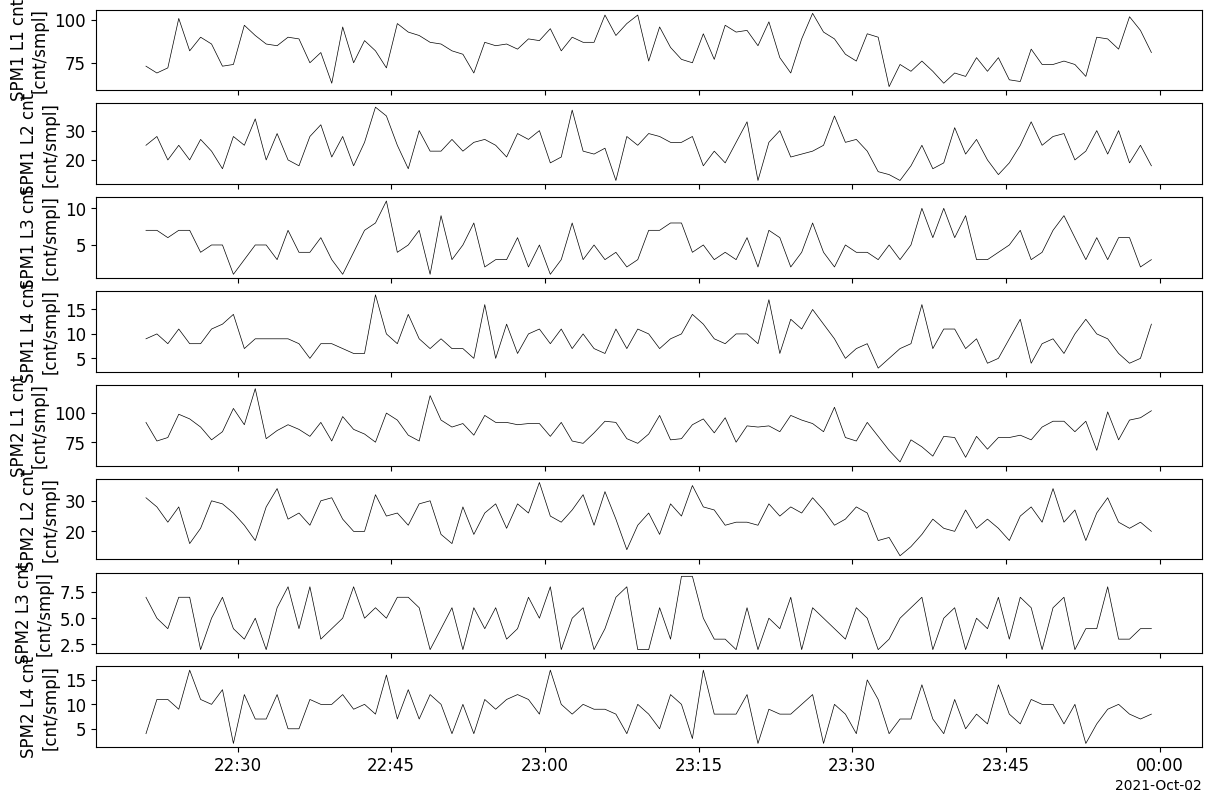

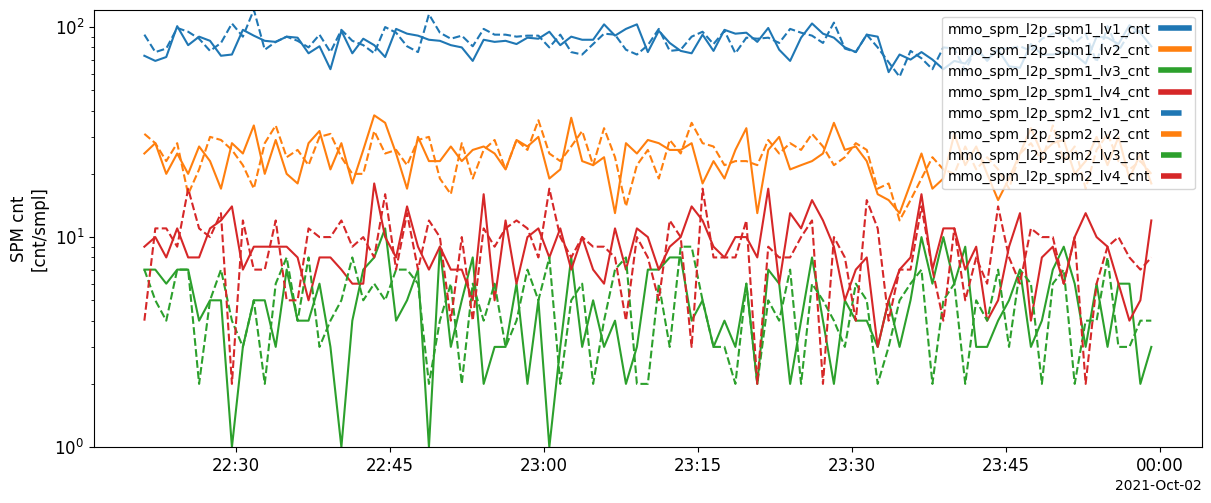

In [4]:
# Load SPM l2p data
spm_vars = spm(trange=trange, level="l2pre",no_update=1)
print(spm_vars)

# Plot SPM l2p data for one channel
tplot(spm_vars)

# Merge all channel data on SPM l2p into a single tplot variable
store_data("merge_spm_l2p", data = spm_vars)

# Set options
options("merge_spm_l2p", 'ylog', 1)
options("merge_spm_l2p", 'legend_names', spm_vars)
options("merge_spm_l2p", 'Color', ['C0', 'C1', 'C2', 'C3', 'C0', 'C1', 'C2', 'C3'])
ls = ['solid_line', 'dash']
options("merge_spm_l2p", 'linestyle', [ls[0], ls[0], ls[0], ls[0], ls[1], ls[1], ls[1], ls[1]])
options("merge_spm_l2p", 'thick', 1.5)
options("merge_spm_l2p", 'ytitle', 'SPM cnt')

# Plot the merged data as similar as Figure 5(b) in Kinoshita et al. (2025)
tplot("merge_spm_l2p")

#### 3. 1. 2. MIA
* Mercury Ion Analyzer (MIA), one of the MPPE sensors onboard Mio, measures both the 3D distribution function of solar wind ions around Mercury and the planet’s magnetospheric ions to understand the structure and plasma dynamics of Mercury’s magnetosphere, Mercury-solar wind interaction, atmospheric abundances, structures, and generation/loss processes, and the solar wind at Mercury’s position.
* In this demonstration, we load MIA l2pre data that contains the energetic ion flux data in the energy range of 10 eV/q to 30 keV/q.
* MIA l2pre data is calibrated.
* The detailed information is described in Mio SC webpage and the instrument reference:
  * MIA information: [https://miosc.isee.nagoya-u.ac.jp/about/satellite/mppe_mia.php]
  * Instrument reference: Pre-flight Calibration and Near-Earth Commissioning Results of the Mercury Plasma Particle Experiment (MPPE) Onboard MMO (Mio) (Saito et al., 2021) [https://link.springer.com/article/10.1007/s11214-021-00839-2]
* tplot variable name: mmo_spm_l2p_spm1_lv3_cnt

08-Jan-26 18:03:39: Local file found: chs_data/satellite/mmo/cdf/mppe/mia/l2pre/et-all/2021/10/bc_mmo_mppe-mia_l2p_l-et-all_20211001_r01-v00-00.cdf


['mmo_mia_l2p_l_et-all_count_d1', 'mmo_mia_l2p_l_et-all_count_d2', 'mmo_mia_l2p_l_et-all_count_d3', 'mmo_mia_l2p_l_et-all_count_d4', 'mmo_mia_l2p_l_et-all_deflux_d1', 'mmo_mia_l2p_l_et-all_deflux_d2', 'mmo_mia_l2p_l_et-all_deflux_d3', 'mmo_mia_l2p_l_et-all_deflux_d4']


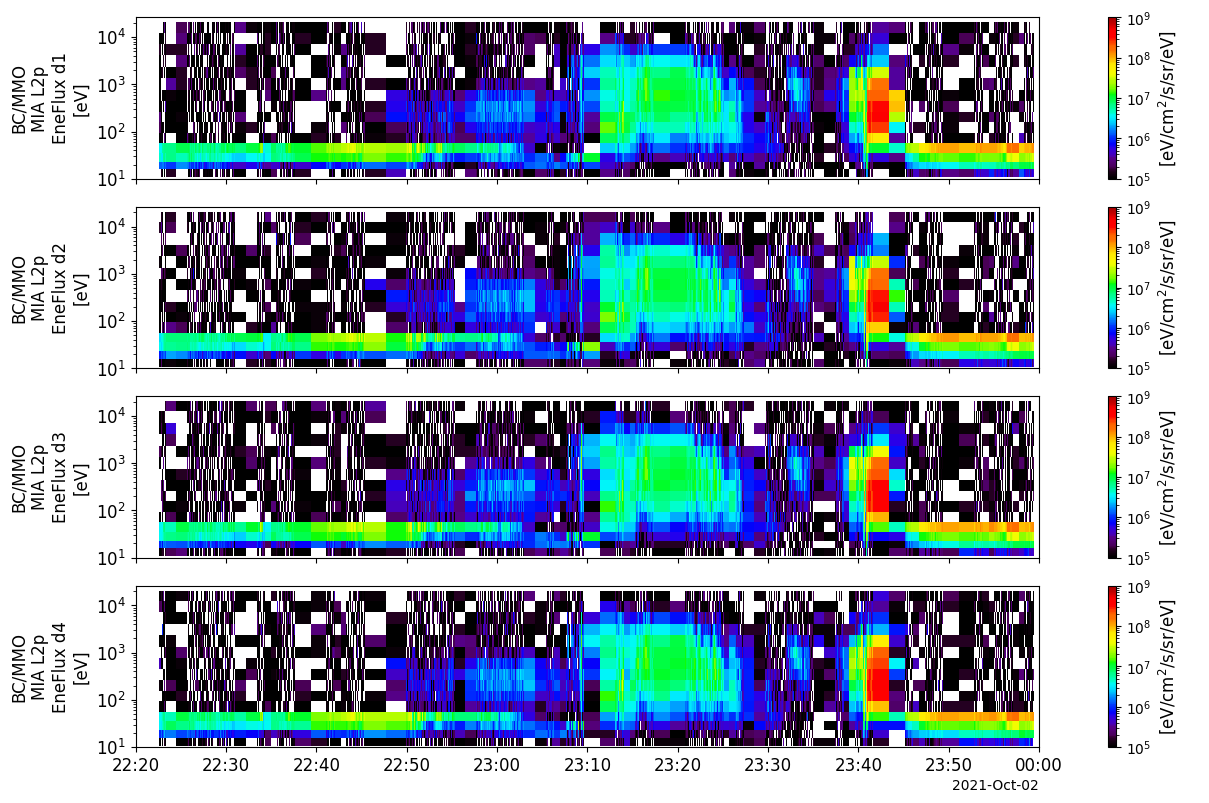

In [5]:
# Load MIA l2p data
mia_vars = mia(trange=trange,level="l2pre",no_update=1)
print(mia_vars)

# plot differential energy flux of MIA data
tplot(mia_vars[4:], trange=['2021-10-01/22:20','2021-10-01/24:00'])

#### 3. 1. 3. PWI/OFA (B)
* The Plasma Wave Investigation (PWI) aboard the MMO will enable the first observations of electric fields, plasma waves, and radio waves in and around the Hermean magnetosphere and exosphere. Onboard Frequency Analyzer (OFA) observes waveforms and spectra in the frequency range from DC (very low frequency) to 120 kHz for the electric field and from 0.3 Hz to 20 kHz for the magnetic field.
* In this demonstration, we load PWI/OFA l2pre data that contains the magnetic field data in the frequency range of 20 Hz to 20 kHz.
* PWI/OFA (B) l2pre data is calibrated.
* Data structures:
  * l-mode: only one component
  * m-mode: two components
* Component information
  * X and Y components: spin-plan  
  * Z component: spin-axis

* The detailed information is described in Mio SC webpage and the instrument reference:
  * PWI information: [https://miosc.isee.nagoya-u.ac.jp/about/satellite/pwi.php]
  * PWI-EWO information: [https://miosc.isee.nagoya-u.ac.jp/about/satellite/pwi_ewo.php]
  * Instrument reference: Plasma Wave Investigation (PWI) Aboard BepiColombo Mio on the Trip to the First Measurement of Electric Fields, Electromagnetic Waves, and Radio Waves Around Mercury (Kasaba et al., 2020) [https://link.springer.com/article/10.1007/s11214-020-00692-9]
* tplot variable name: 
  * Magnetic field (B): mmo_pwi_ofa_'level'_'data mode'_'observatiion mode'_B_spectra_merged
  * Electric field (E): mmo_pwi_ofa_'level'_'data mode'_'observatiion mode'_E_spectra_merged (included after Mercury orbit insertion)

08-Jan-26 18:03:42: Local file found: chs_data/satellite/mmo/cdf/pwi/ofa/l2pre/spec/m/2021/10/bc_mmo_pwi-ofa_l2p_l-spec-ms_20211001_r01-v01-00.cdf


08-Jan-26 18:03:42: wildcard_expand: No match found for mmo_pwi_ofa_l2p_l_ms_spec_E*
08-Jan-26 18:03:42: wildcard_expand: No match found for mmo_pwi_ofa_l2p_l_ms_spec_E*
08-Jan-26 18:03:42: wildcard_expand: No match found for mmo_pwi_ofa_l2p_l_ms_spec_E_*
08-Jan-26 18:03:42: store_data: None of the base variables exist to construct pseudovariable mmo_pwi_ofa_l2p_l_ms_E_spectra_merged
08-Jan-26 18:03:42: wildcard_expand: No match found for mmo_pwi_ofa_l2p_l_ms_E_spectra_merged
08-Jan-26 18:03:42: wildcard_expand: No match found for mmo_pwi_ofa_l2p_l_ms_E*_spectra_*
08-Jan-26 18:03:42: wildcard_expand: empty pattern list
08-Jan-26 18:03:42: wildcard_expand: No match found for mmo_pwi_ofa_l2p_l_ms_E*_spectra_*
08-Jan-26 18:03:42: wildcard_expand: empty pattern list
08-Jan-26 18:03:42: wildcard_expand: No match found for mmo_pwi_ofa_l2p_l_ms_E*_spectra_*
08-Jan-26 18:03:42: wildcard_expand: empty pattern list
08-Jan-26 18:03:42: wildcard_expand: No match found for mmo_pwi_ofa_l2p_l_ms_E*_s

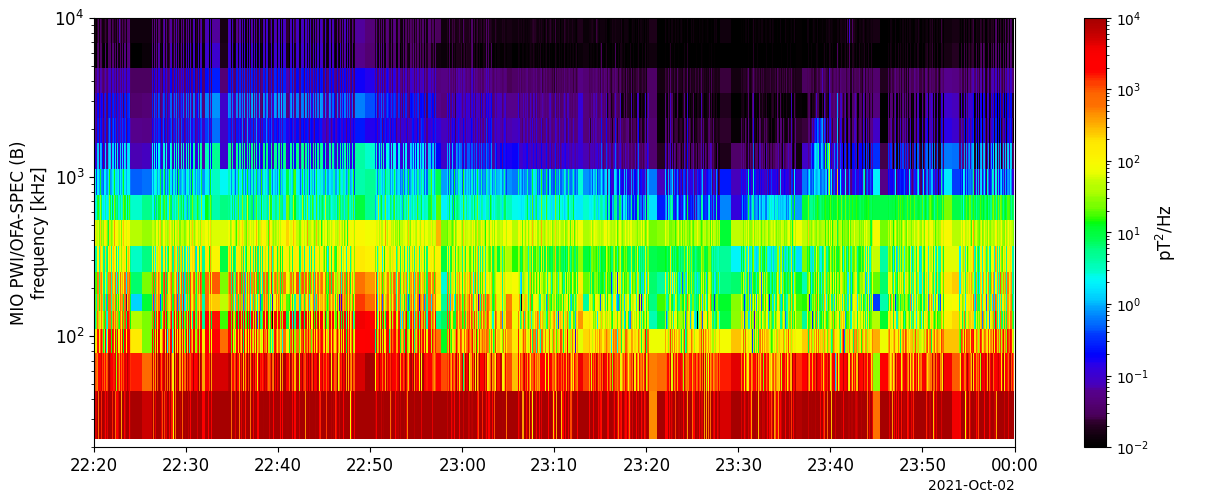

In [6]:
# Load PWI/OFA l2p l-mode data
var_ofa_l=ofa( trange=trange,no_update=1,data_mode='l' )

# set options for l-mode
options('mmo_pwi_ofa_l2p_l_ms_B_spectra_merged',  'yrange', [2*1e1,1e4])
options('mmo_pwi_ofa_l2p_l_ms_B_spectra_merged',  'Ylog', 1)
options('mmo_pwi_ofa_l2p_l_ms_B_spectra_merged',  'zrange', [1e-2,1e4])
options('mmo_pwi_ofa_l2p_l_ms_B_spectra_merged',  'zlog', 1)

# plot F-T diagram for l-mode data
tplot('mmo_pwi_ofa_l2p_l_ms_B_spectra_merged',trange=['2021-10-01/22:20','2021-10-01/24:00'])


08-Jan-26 18:03:43: Local file found: chs_data/satellite/mmo/cdf/pwi/ofa/l2pre/spec/m/2021/10/bc_mmo_pwi-ofa_l2p_m-spec-ms_20211001_r01-v01-00.cdf
08-Jan-26 18:03:43: wildcard_expand: No match found for mmo_pwi_ofa_l2p_m_ms_spec_E*
08-Jan-26 18:03:43: wildcard_expand: No match found for mmo_pwi_ofa_l2p_m_ms_spec_E*
08-Jan-26 18:03:43: wildcard_expand: No match found for mmo_pwi_ofa_l2p_m_ms_spec_Ex_*
08-Jan-26 18:03:43: store_data: None of the base variables exist to construct pseudovariable mmo_pwi_ofa_l2p_m_ms_Ex_spectra_merged
08-Jan-26 18:03:43: wildcard_expand: No match found for mmo_pwi_ofa_l2p_m_ms_spec_Ey_*
08-Jan-26 18:03:43: store_data: None of the base variables exist to construct pseudovariable mmo_pwi_ofa_l2p_m_ms_Ey_spectra_merged
08-Jan-26 18:03:43: wildcard_expand: No match found for mmo_pwi_ofa_l2p_m_ms_Ex_spectra_merged
08-Jan-26 18:03:43: wildcard_expand: No match found for mmo_pwi_ofa_l2p_m_ms_Ey_spectra_merged
08-Jan-26 18:03:43: wildcard_expand: No match found for

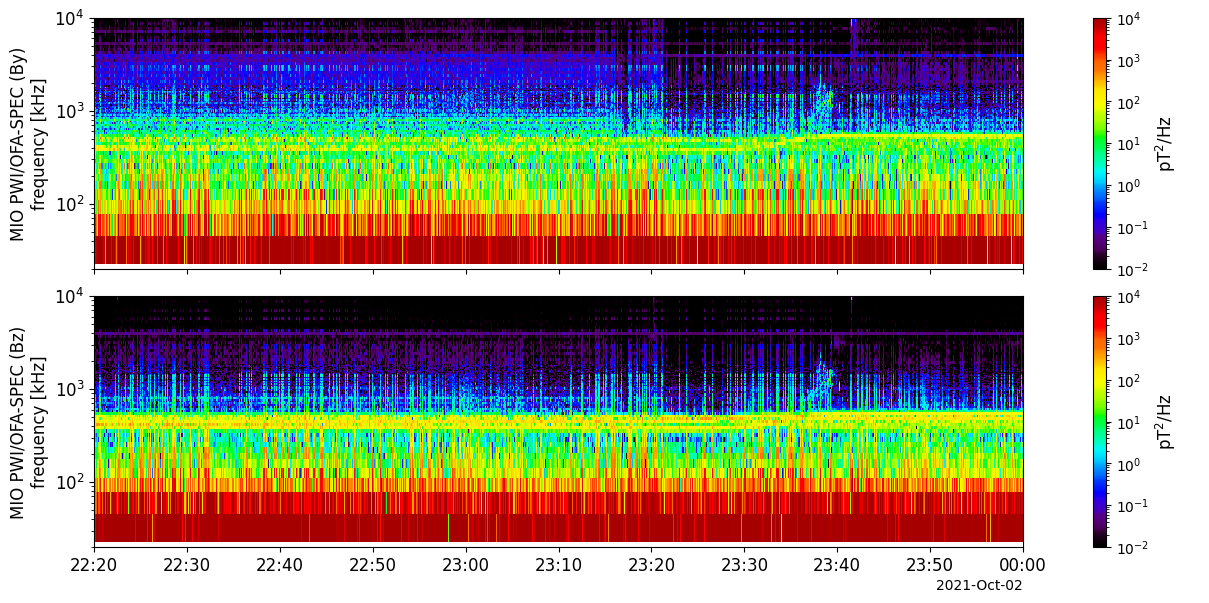

In [7]:
# Load PWI/OFA l2p m-mode data
var_ofa_m=ofa( trange=trange,no_update=1,data_mode='m')

# set options for m-mode
options('mmo_pwi_ofa_l2p_m_ms_B*_spectra_merged',  'yrange', [2*1e1,1e4])
options('mmo_pwi_ofa_l2p_m_ms_B*_spectra_merged',  'Ylog', 1)
options('mmo_pwi_ofa_l2p_m_ms_B*_spectra_merged',  'zrange', [1e-2,1e4])
options('mmo_pwi_ofa_l2p_m_ms_B*_spectra_merged',  'zlog', 1)

# plot F-T diagram for m-mode data
tplot('mmo_pwi_ofa_l2p_m_ms_B*_spectra_merged',trange=['2021-10-01/22:20','2021-10-01/24:00'])

### 3. 2. Plot multiple data
Plot SPM, MIA, and PWI/OFA (B) data simultaneously for the 1st flyby.

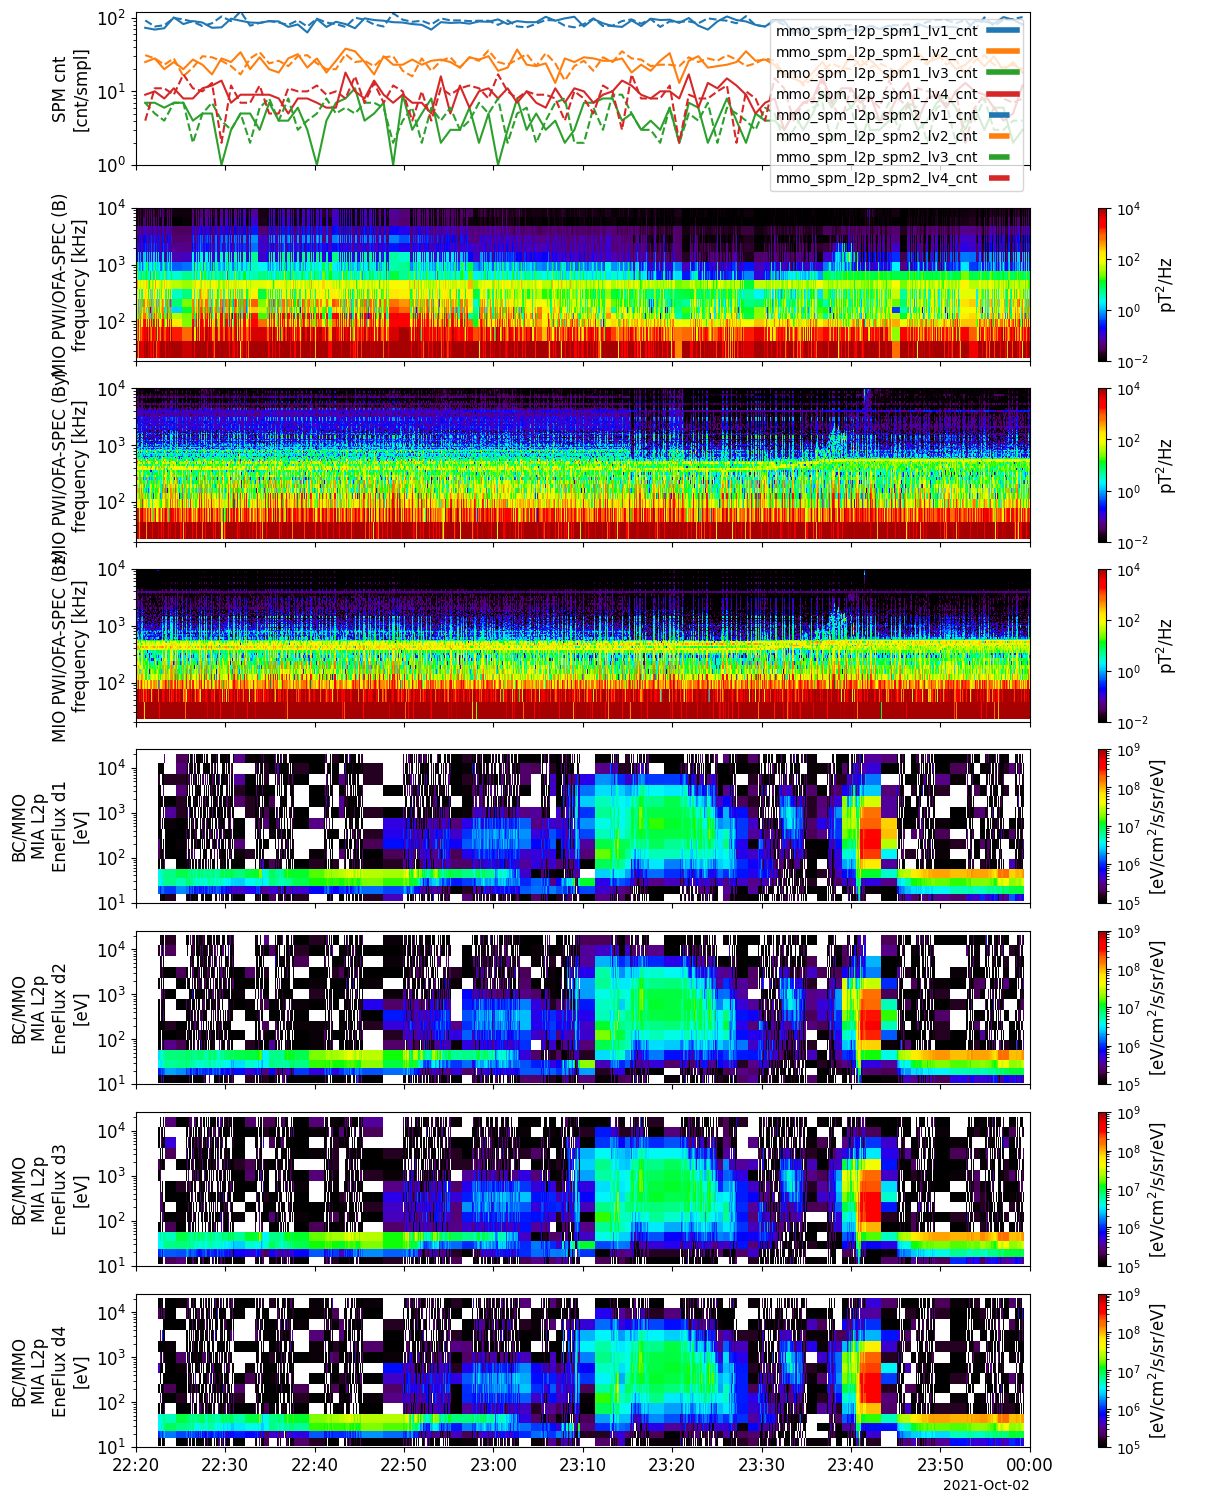

In [8]:
selected_tplot = ["merge_spm_l2p", 
                  "mmo_pwi_ofa_l2p_l_ms_B_spectra_merged","mmo_pwi_ofa_l2p_m_ms_B*_spectra_merged", 
                  'mmo_mia_l2p_l_et-all_deflux_d1', 'mmo_mia_l2p_l_et-all_deflux_d2', 'mmo_mia_l2p_l_et-all_deflux_d3', 'mmo_mia_l2p_l_et-all_deflux_d4']
tplot(selected_tplot,trange=['2021-10-01/22:20','2021-10-01/24:00'], ysize=15)

## 4. Demonstration of CHS plug-in
We also demonstrate loading and plotting data obtained from the SUSANOO-SW model. 
SUSANOO (Space-weather-forecast-Usable System Anchored by Numerical Operations and Observations) is a 3D MHD simulation based on observations of the Sun (Shita et al., 2014, Space Weather). 
ISEE SUSANOO-SW data includes the solar wind data simulated by SUSANOO, which are archived in the Common Data Format (CDF).

Plug-ins for SUSANOO-SW data is currently independent from the Mio-SC plug-in. Please install the CHS plug-in for PySPEDAS using the following command:

```Python
pip install git+https://github.com/ergsc-devel/chs_pyspedas.git
```

In [9]:
import chs_pyspedas
from chs_pyspedas.susanoo.load import su_load
import numpy as np

08-Jan-26 18:03:57: Downloading remote index: https://chs.isee.nagoya-u.ac.jp/data/chs/simulation/susanoo/data/cdf/mercury/2021/10/
08-Jan-26 18:03:58: File is current: chs_data/simulation/susanoo/data/cdf/mercury/2021/10/susanoo_sw_mercury_5m_20211001_v01.01.cdf
08-Jan-26 18:03:59: File is current: chs_data/simulation/susanoo/data/cdf/mercury/2021/10/susanoo_sw_mercury_5m_20211002_v01.01.cdf
08-Jan-26 18:04:00: File is current: chs_data/simulation/susanoo/data/cdf/mercury/2021/10/susanoo_sw_mercury_5m_20211003_v01.01.cdf
08-Jan-26 18:04:01: File is current: chs_data/simulation/susanoo/data/cdf/mercury/2021/10/susanoo_sw_mercury_5m_20211004_v01.01.cdf
08-Jan-26 18:04:02: File is current: chs_data/simulation/susanoo/data/cdf/mercury/2021/10/susanoo_sw_mercury_5m_20211005_v01.01.cdf
08-Jan-26 18:04:03: File is current: chs_data/simulation/susanoo/data/cdf/mercury/2021/10/susanoo_sw_mercury_5m_20211006_v01.01.cdf
08-Jan-26 18:04:04: File is current: chs_data/simulation/susanoo/data/cdf/me

['susanoo_sw_dens_mercury', 'susanoo_sw_pre_mercury', 'susanoo_sw_swvv_mercury', 'susanoo_sw_imfb_mercury']


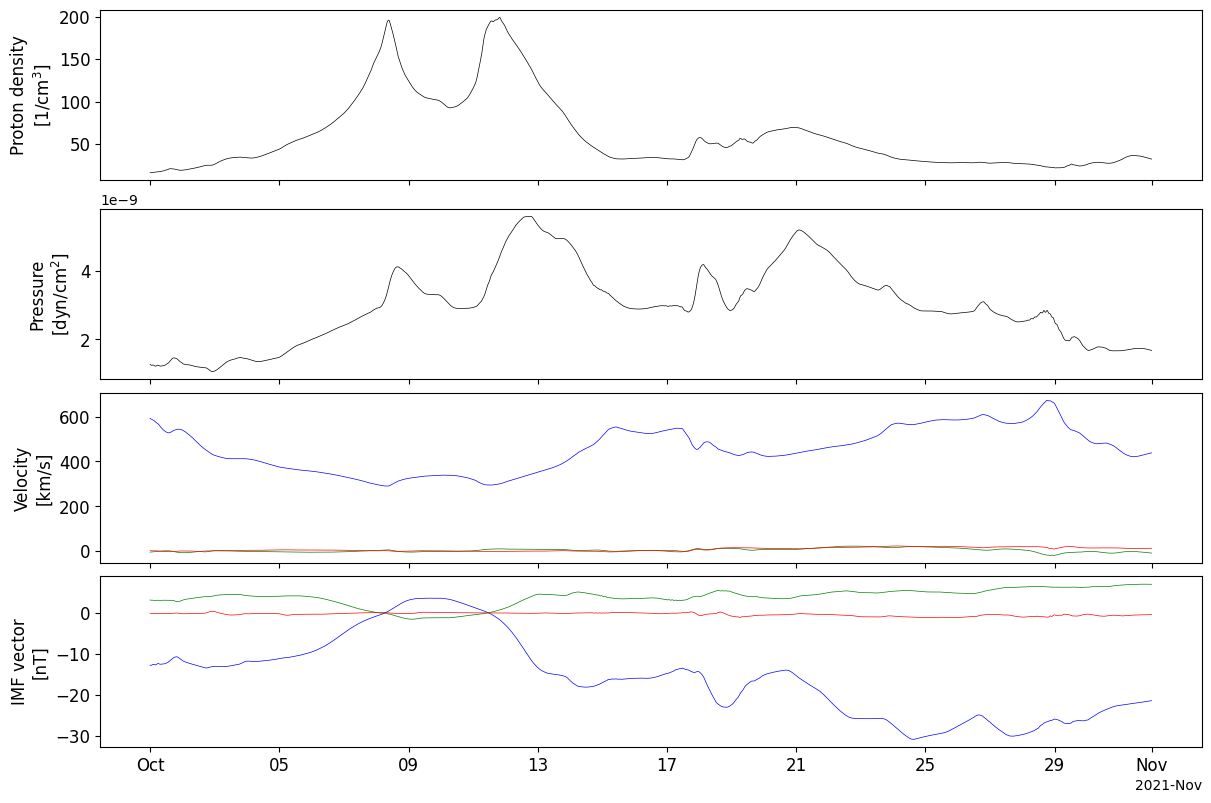

In [10]:
# Load SUSANOO-SW data
susanoo_vars = su_load(trange= ['2021-10-01', '2021-11-01'], site = 'mercury')
print(susanoo_vars)

# 'susanoo_sw_dens_**' --> Solar wind density on each location [cm^-3]
# 'susanoo_sw_pre_**' --> Solar wind pressure on each location [dyn cm^-2] (= 0.1 [Pa] = 10^8 [nPa])
# 'susanoo_sw_swvv_**' --> Solar wind velocity vector on each location [km/s]
# 'susanoo_sw_imfb_**' --> IMF vector on each location [nT]

tplot(susanoo_vars)

08-Jan-26 18:04:34: Local files found: ['chs_data/simulation/susanoo/data/cdf/mercury/2021/10/susanoo_sw_mercury_5m_20211001_v01.01.cdf']


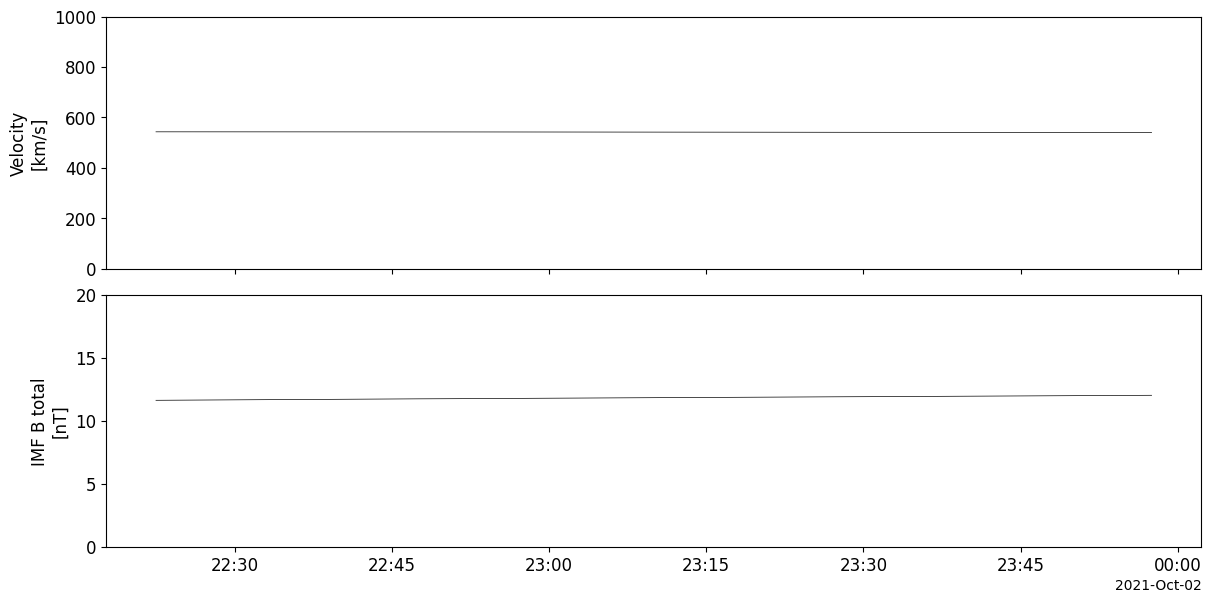

In [11]:
# Load SUSANOO-SW data
susanoo_vars = su_load(trange= ['2021-10-01/22:20', '2021-10-01/24:00'], no_update=1, site = 'mercury')

# Calculate solar wind speed
time_suvv, susanoo_vv = get_data('susanoo_sw_swvv_mercury')
susanoo_vv_meta = get_data('susanoo_sw_swvv_mercury', metadata=True)
susanoo_swspeed = np.sqrt(susanoo_vv[:, 0]**2 + susanoo_vv[:, 1]**2 + susanoo_vv[:, 2]**2)

# Store as a new tplot variable
store_data("susanoo_sw_speed_mercury", data = {'x': time_suvv, 'y': susanoo_swspeed}, attr_dict= susanoo_vv_meta)
options('susanoo_sw_speed_mercury',  'yrange', [0,1000])

# Calculate IMF B total
time_suimfb, susanoo_imfb = get_data('susanoo_sw_imfb_mercury')
susanoo_imfb_meta = get_data('susanoo_sw_imfb_mercury', metadata=True)
susanoo_Btot = np.sqrt(susanoo_imfb[:, 0]**2 + susanoo_imfb[:, 1]**2 + susanoo_imfb[:, 2]**2)

# Store as a new tplot variable
store_data("susanoo_imfbtot_mercury", data = {'x': time_suimfb, 'y': susanoo_Btot}, attr_dict= susanoo_imfb_meta)
options('susanoo_imfbtot_mercury',  'ytitle', 'IMF B total')
options('susanoo_imfbtot_mercury',  'yrange', [0,20])

# Plot generated tplot variables
tplot(["susanoo_sw_speed_mercury", "susanoo_imfbtot_mercury"]) 

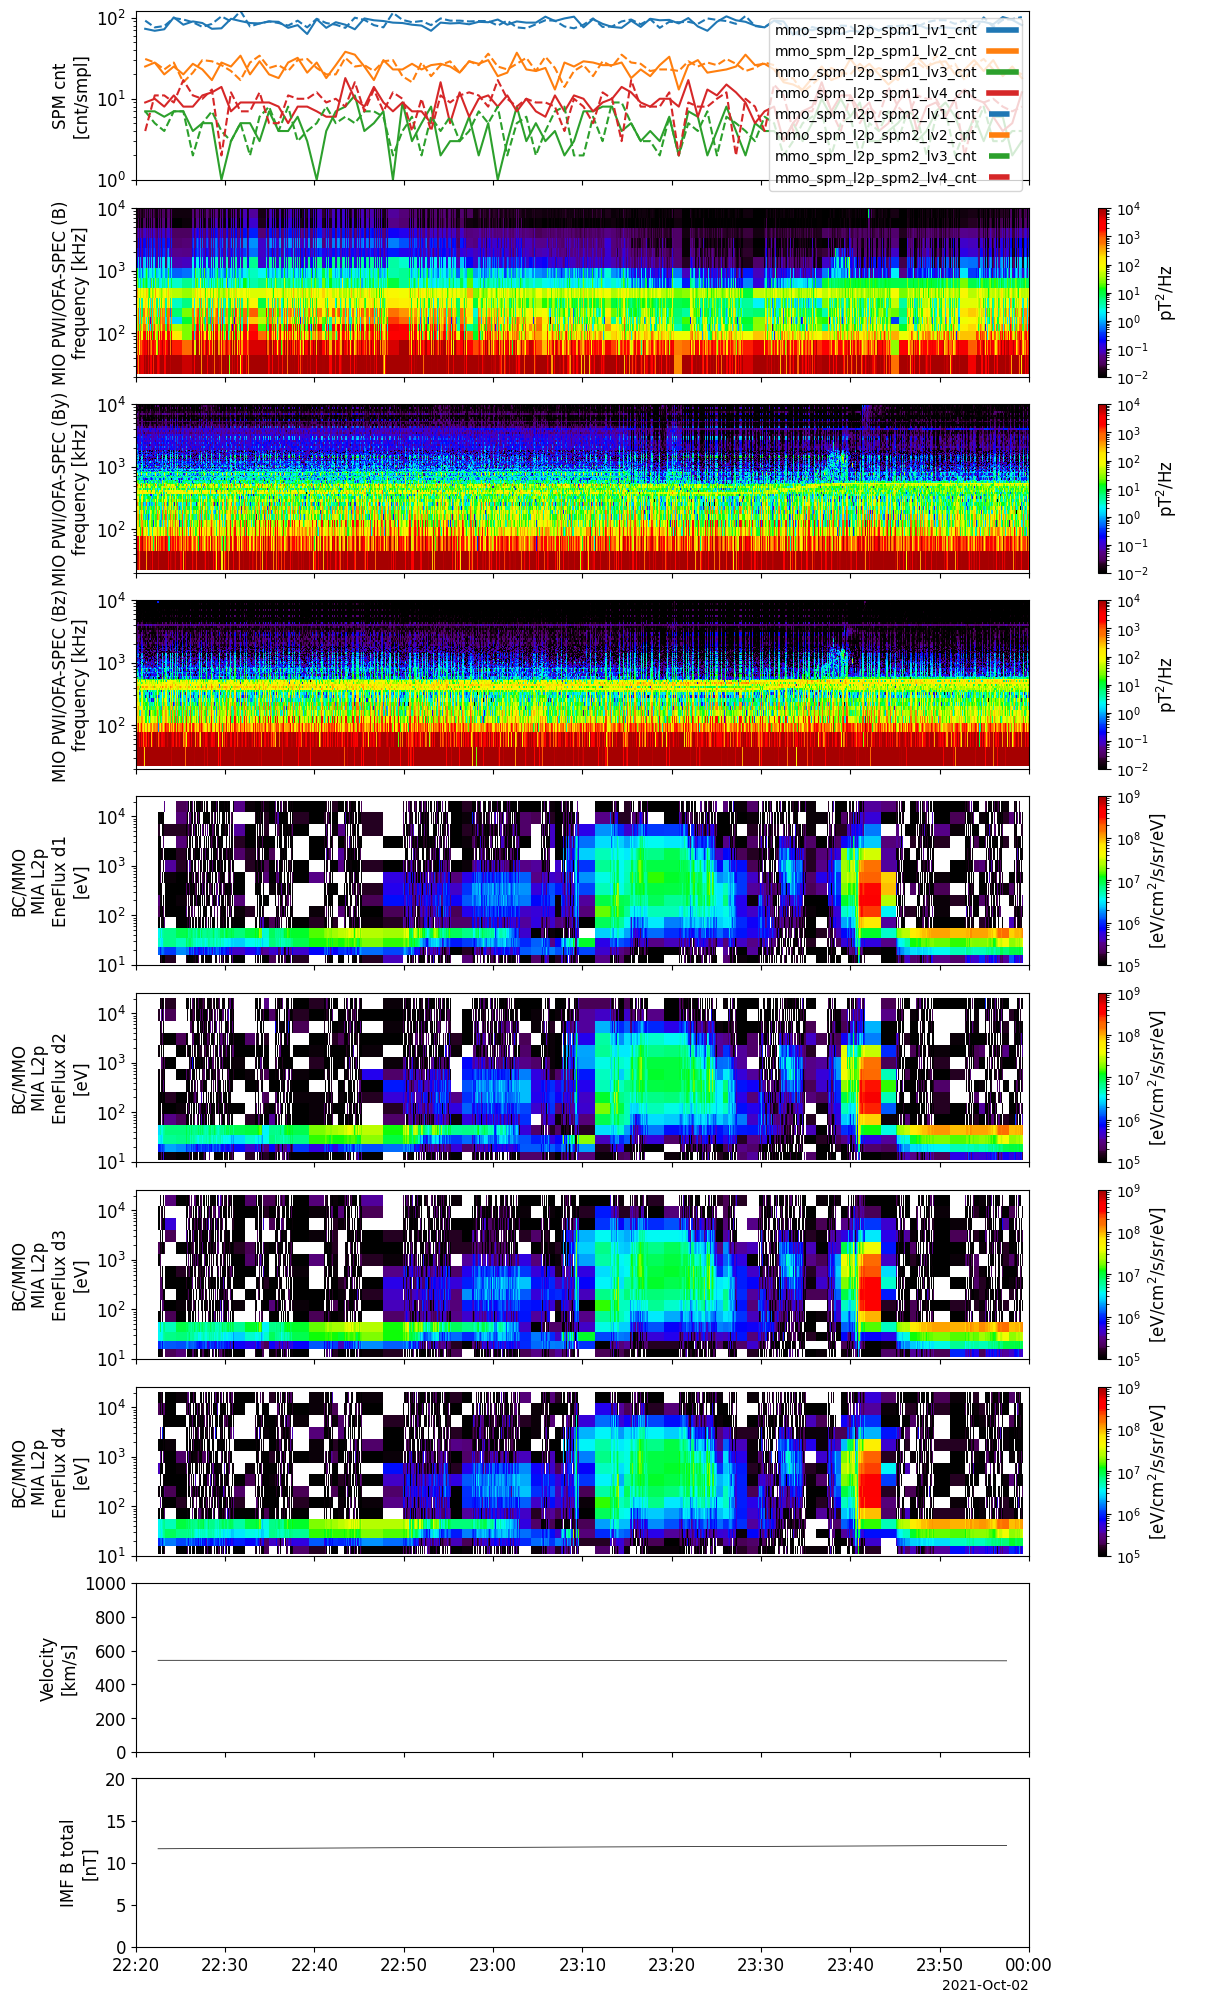

In [12]:
# Migrate plots

selected_tplot = ["merge_spm_l2p",
                  "mmo_pwi_ofa_l2p_l_ms_B_spectra_merged", "mmo_pwi_ofa_l2p_m_ms_B*_spectra_merged",
                  'mmo_mia_l2p_l_et-all_deflux_d1', 'mmo_mia_l2p_l_et-all_deflux_d2', 'mmo_mia_l2p_l_et-all_deflux_d3', 'mmo_mia_l2p_l_et-all_deflux_d4',
                  "susanoo_sw_speed_mercury", "susanoo_imfbtot_mercury"]
tplot(selected_tplot,trange=['2021-10-01/22:20','2021-10-01/24:00'], ysize=20)